# 从 B 站弹幕抓取 00 后的“圈聊黑话”

#### 1.B 站弹幕的原理

#### 2.Beautiful Soup 使用介绍

##### 2.1BeautifulSoup的安装
因为BeautifulSoup在使用过程中，会依赖lxml解析器，所以安装前，要确保lxml也必须安装。

pip install lxml

pip install beautifulsoup4

##### 2.2 BeautifulSoup基本用法

In [17]:
from bs4 import BeautifulSoup 

In [18]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>

<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [19]:
soup = BeautifulSoup(html_doc,"lxml")

In [20]:
soup.head

<head><title>The Dormouse's story</title></head>

In [21]:
soup.title

<title>The Dormouse's story</title>

In [22]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [23]:
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [24]:
soup.p.get_text()

"The Dormouse's story"

In [25]:
soup.a['href']

'http://example.com/elsie'

In [26]:
soup.a['class']

['sister']

In [27]:
soup.head.contents

[<title>The Dormouse's story</title>]

In [28]:
soup.find_all('title', limit=1)

[<title>The Dormouse's story</title>]

In [29]:
soup.find('title')

<title>The Dormouse's story</title>

In [30]:
soup.find_all('title')

[<title>The Dormouse's story</title>]

In [31]:
soup.find_all('p','title')

[<p class="title"><b>The Dormouse's story</b></p>]

In [32]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [33]:
soup.find_all(id="link2")

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [34]:
soup.find_all(id=True)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [38]:
soup.select("body a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [39]:
soup.select("html head title")

[<title>The Dormouse's story</title>]

In [40]:
soup.select("title")

[<title>The Dormouse's story</title>]

In [41]:
soup.select("p")

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [42]:
soup.select("head > title")

[<title>The Dormouse's story</title>]

In [43]:
soup.select("p > a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [44]:
soup.select("#link1")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

In [45]:
soup.select(".sister")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [46]:
soup.select('a[href]')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

#### 3. 爬虫抓取 B 站弹幕

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [48]:
url = 'http://comment.bilibili.com/69082679.xml'
req = requests.get(url)
html = req.content
html_doc=str(html,'utf-8')   #修改成utf-8

In [49]:
#解析
soup = BeautifulSoup(html_doc,"lxml")
results = soup.find_all('d')
contents = [x.text for x in results]

In [50]:
#保存结果
table_dict = {"contents":contents}
df = pd.DataFrame(table_dict)
df.to_csv("bibi.csv",encoding='utf-8')

#### 4. 对弹幕进行简单分析

In [68]:
#引入所需要的包
import os
import jieba
import pandas as pd 
import numpy as np
from scipy.misc import imread 
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
#定义文件路径
dir =  "D://demo//comment_bilibili//"
#定义语料文件路径
file = os.path.join("bibi.csv")
#定义停用词文件路径
stop_words = os.path.join("stopwords.txt")
#定义wordcloud中字体文件的路径
simhei = os.path.join("simhei.ttf")
#读取语料
df = pd.read_csv(file, encoding='utf-8')
df.head()
#如果存在nan，删除
df.dropna(inplace=True)
#将content一列转为list
content=df.contents.values.tolist()
#用jieba进行分词操作
segment=[]
for line in content:
    try:
        segs=jieba.cut_for_search(line)
        segs = [v for v in segs if not str(v).isdigit()]#去数字
        segs = list(filter(lambda x:x.strip(), segs))   #去左右空格
        #segs = list(filter(lambda x:len(x)>1, segs)) #长度为1的字符
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
#分词后加入一个新的DataFrame
words_df=pd.DataFrame({'segment':segment})
#加载停用词
stopwords=pd.read_csv(stop_words,index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')               
#安装关键字groupby分组统计词频，并按照计数降序排序
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
#分组之后去掉停用词
words_stat=words_stat[~words_stat.segment.isin(stopwords.stopword)]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [74]:
words_stat.head(10).segment.values.tolist()

['老婆', '太太', '笑容', '世界', '啊啊啊', '0v0', '喜欢', '企业', '快乐', '游戏']

#### 下面是重点，绘制wordcloud词云，这一提供2种方式

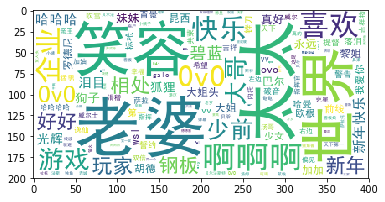

In [64]:
#第一种是默认的样式
wordcloud=WordCloud(font_path=simhei,background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()
wordcloud.to_file(r'wordcloud_1.jpg')  #保存结果

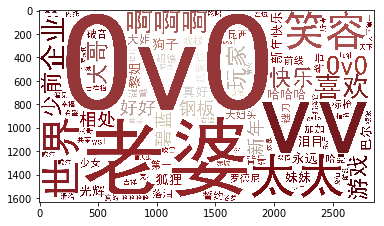

In [67]:
#第二种是自定义图片
text = " ".join(words_stat['segment'].head(100).astype(str))
abel_mask = imread(r"year2019.jpg")  #这里设置了一张自定义图片
wordcloud2 = WordCloud(background_color='white',  # 设置背景颜色 
                     mask = abel_mask,  # 设置背景图片
                     max_words = 3000,  # 设置最大现实的字数
                     font_path = simhei,  # 设置字体格式
                     width=2048,
                     height=1024,
                     scale=4.0,
                     max_font_size= 300,  # 字体最大值
                     random_state=42).generate(text)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
wordcloud2.recolor(color_func=image_colors)
# 以下代码显示图片
plt.imshow(wordcloud2)
#plt.axis("off")
plt.show()
wordcloud2.to_file(r'wordcloud_2.jpg') #保存结果